In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmerpenguins/palmerpenguins.csv


In [2]:
df = pd.read_csv("/kaggle/input/palmerpenguins/palmerpenguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


In [5]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [6]:
# there is no missing values in the data

In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
diet                  object
life_stage            object
health_metrics        object
year                   int64
dtype: object

In [8]:
df.select_dtypes(include = object).columns.tolist()

['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']

In [9]:
df.select_dtypes(include = np.number).columns.tolist()

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

In [10]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [11]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
df["life_stage"].unique()

array(['adult', 'juvenile', 'chick'], dtype=object)

In [13]:
df["diet"].unique()

array(['fish', 'krill', 'parental', 'squid'], dtype=object)

In [14]:
count_values = df[['species','sex','diet','life_stage']].value_counts().reset_index(name="count")
count_values

,species,sex,diet,life_stage,count
0,Adelie,female,krill,juvenile,236
1,Adelie,male,krill,juvenile,231
2,Adelie,male,parental,chick,211
3,Adelie,female,parental,chick,207
4,Gentoo,male,parental,chick,155
5,Gentoo,male,krill,juvenile,150
6,Gentoo,female,parental,chick,137
7,Gentoo,female,krill,juvenile,134
8,Chinstrap,female,krill,juvenile,130
9,Gentoo,male,fish,adult,129


In [15]:
print("count of Gentoo species" , count_values[count_values["species"]=="Gentoo"].sum()[-1])

count of Gentoo species 1247


In [16]:
print("count of Adelie species" , count_values[count_values["species"]=="Adelie"].sum()[-1])

count of Adelie species 1560


In [17]:
print("count of Chinstrap species" , count_values[count_values["species"]=="Chinstrap"].sum()[-1])

count of Chinstrap species 623


**analysis done in the basis of species**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


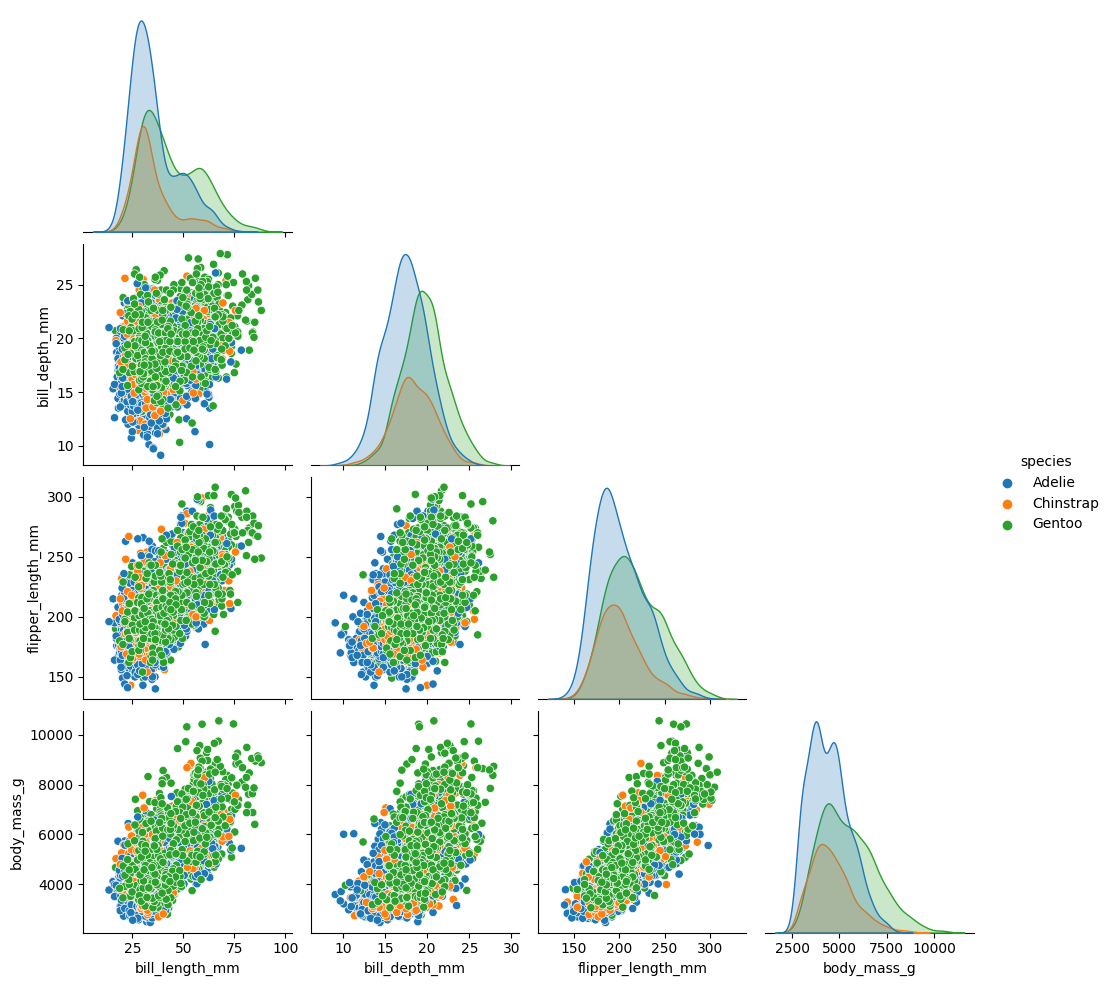

In [18]:

species_columns = df[["species",'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

sns.pairplot(species_columns, corner=True , hue = "species")

In [19]:
species_df  = pd.pivot_table(data = df,index = ["species"],values = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] , aggfunc = "mean")
species_df

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
species,,,,
Adelie,17.464487,35.431603,4445.475641,200.759615
Chinstrap,18.421188,35.014607,4602.531300,201.675762
Gentoo,19.689415,44.161909,5437.640738,217.546111


inference from the table:
    
Gento : which is high in all the features compared to other species, where it has deep bills and longest bills and its body mass also high and it flipper length is high. which says that comparing to other species gento is larger.

Adelie : species which is significantly equal to the chinstrap features but has less body mass.

Chinstrap : only the body mass index is high, in all other aspects it is similar to the adelie.


**analysis done in the basis of diet**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


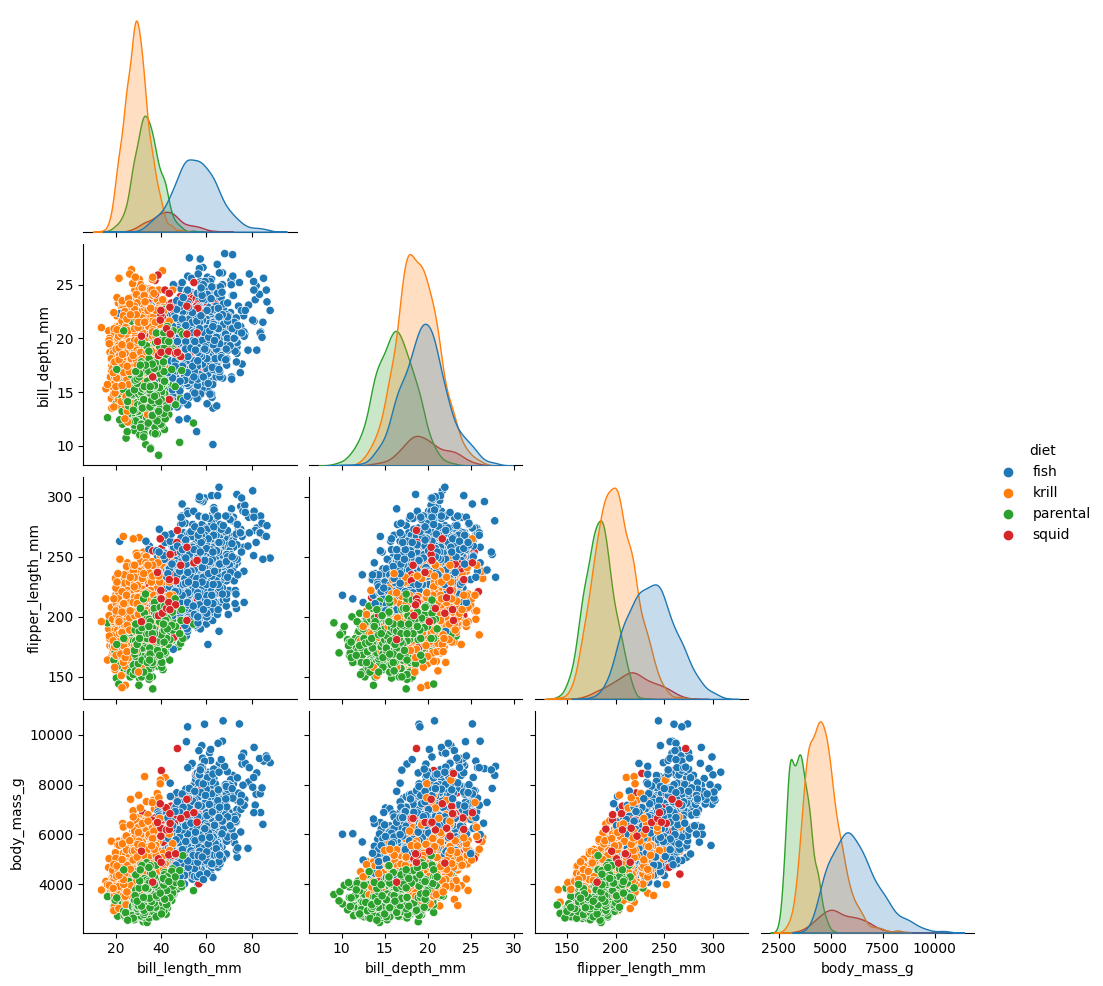

In [20]:
for_diet = df[["diet",'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]


sns.pairplot(for_diet, corner=True , hue = "diet")

In [21]:
pd.pivot_table(data = df , values = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],index=["diet"],aggfunc = "mean").round(1)


,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
diet,,,,
fish,19.6,55.6,6173.4,237.4
krill,18.8,29.2,4627.9,199.5
parental,16.2,33.9,3530.9,183.0
squid,19.7,42.7,5520.3,218.6


analysis for the penguin  according to the diet:

fish -- according to the analysis the penguin which is having fish as its diet has high in all the features like having more deep bills , bill length is high, body mass is high and flipper length is also high

squid -- after fish feed the squid feed has high attributes

krill -- low when compared to fish and squid feed but higher than parental feed

parental -- this feed which shows that it has less attributes compared to all other feed

**analysis done for penguin on the basis of sex**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


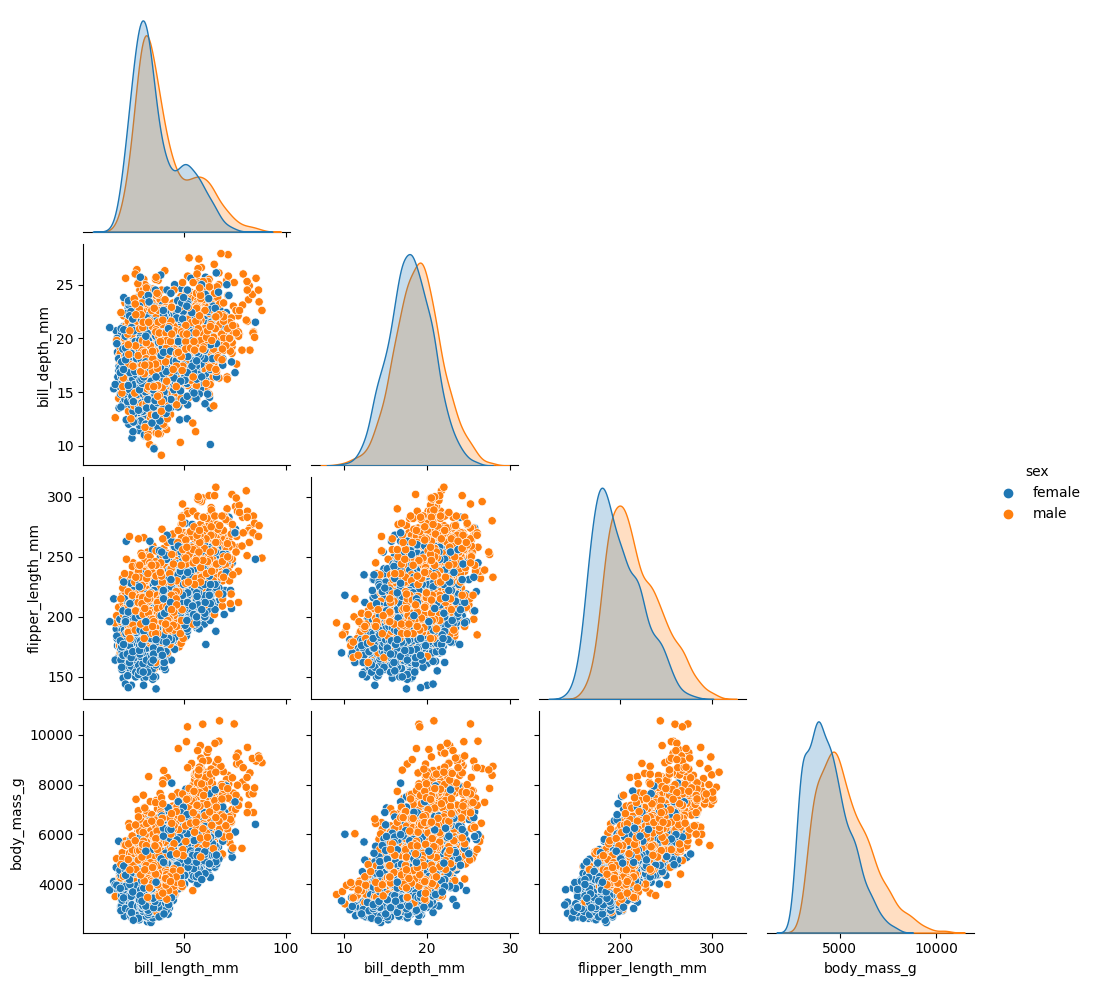

In [22]:
columns_for_year = df[['sex','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

sns.pairplot(columns_for_year, corner=True, hue = "sex")

In [23]:
pd.pivot_table(data=df, index = "sex" , values = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],aggfunc = "mean")

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
sex,,,,
female,17.983082,36.857822,4396.509849,197.551564
male,18.917195,40.223415,5278.568662,216.628521


Male Penguins: Generally larger in all metrics, including deeper and longer bills, higher body mass, and longer flippers.

Female Penguins: Have smaller dimensions across the board, with shallower and shorter bills, lower body mass, and shorter flippers.

These observations indicate sexual dimorphism in the penguin populations studied. The males are noticeably larger, suggesting that these metrics can be important features to distinguish between sexes in biological or machine learning studies.

**analysis done for penguin on the basis of year**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


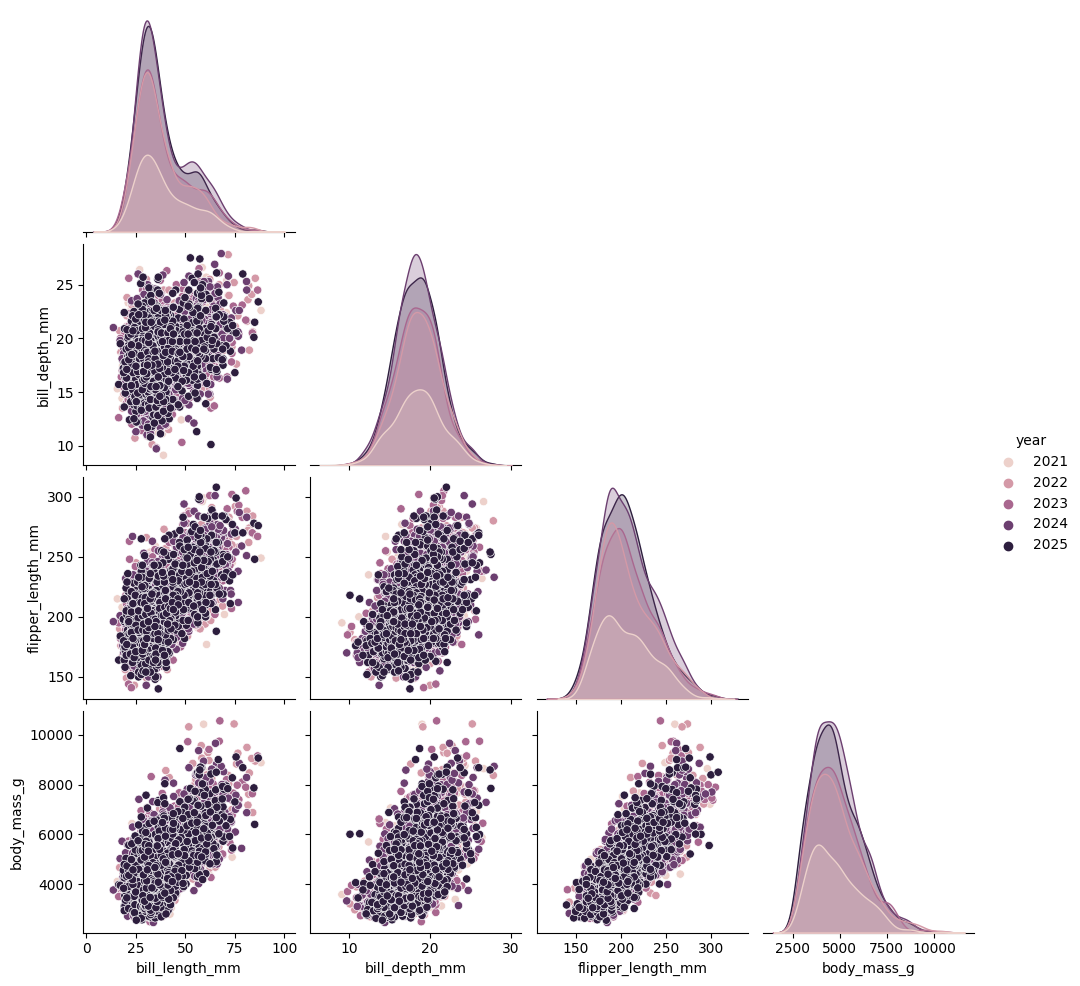

In [24]:
columns_for_year = df[['year','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

sns.pairplot(columns_for_year, corner=True, hue = "year")

In [25]:
pd.pivot_table(data =df, index = "year",values = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] , aggfunc = "mean").round(1)


,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
year,,,,
2021,18.5,38.6,4780.2,206.2
2022,18.6,38.0,4863.1,206.4
2023,18.4,38.4,4833.1,207.2
2024,18.4,39.3,4874.8,208.4
2025,18.4,38.2,4795.3,206.2


analysis for the penguin according to the year:


Bill Depth: Remains relatively stable across years, ranging from 18.4 to 18.6 mm.

Bill Length: Also exhibits minimal fluctuation, with a slightly increased length noted in 2024.

Body Mass: Shows a general increase from 2021 to 2024, followed by a slight decrease in 2025.

Flipper Length: Incrementally increases from 2021 to 2024, but reverts to the 2021 length in 2025.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


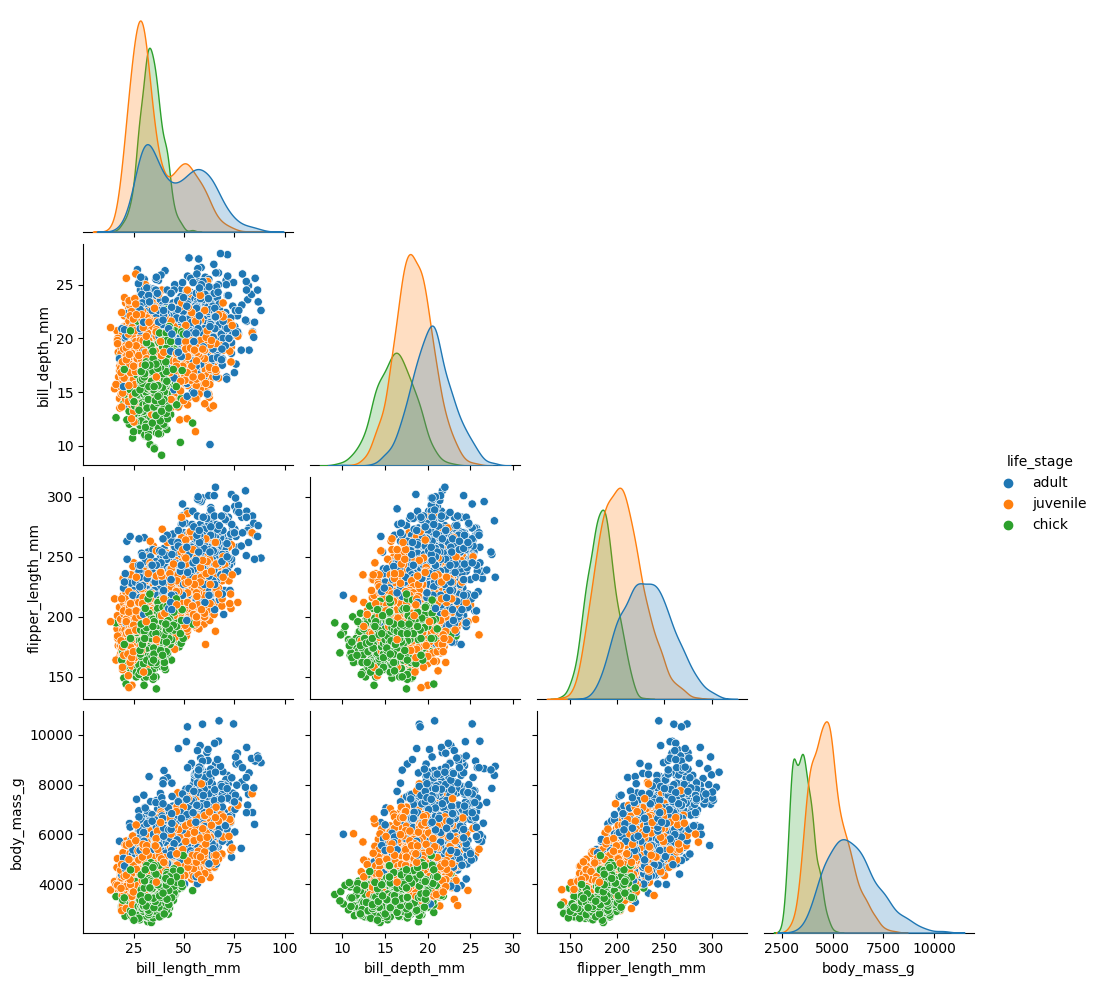

In [26]:
columns_for_lifestage = df[["life_stage",'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

sns.pairplot(columns_for_lifestage , corner=True,hue = "life_stage")

In [27]:
pd.pivot_table(data=df, index = "life_stage", values = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],aggfunc = "mean")

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
life_stage,,,,
adult,20.457629,46.108844,5986.529640,232.127308
chick,16.217209,33.895930,3530.867442,183.025581
juvenile,18.349124,36.055029,4793.232966,203.665152


Adult Penguins: Display the highest values for each attribute—deepest bills, longest bills, greatest body mass, and longest flippers.

Juvenile Penguins: Fall in between adults and chicks in terms of all attributes, showing a transitional stage in their development.

Chick Penguins: Possess the lowest measurements across all attributes, reflecting their early stage in life.


**correlation**

In [28]:
columns =df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

correlation = columns.corr().round(2)
correlation

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,0.31,0.67,0.66
bill_depth_mm,0.31,1.00,0.49,0.56
flipper_length_mm,0.67,0.49,1.00,0.79
body_mass_g,0.66,0.56,0.79,1.00


<Axes: >

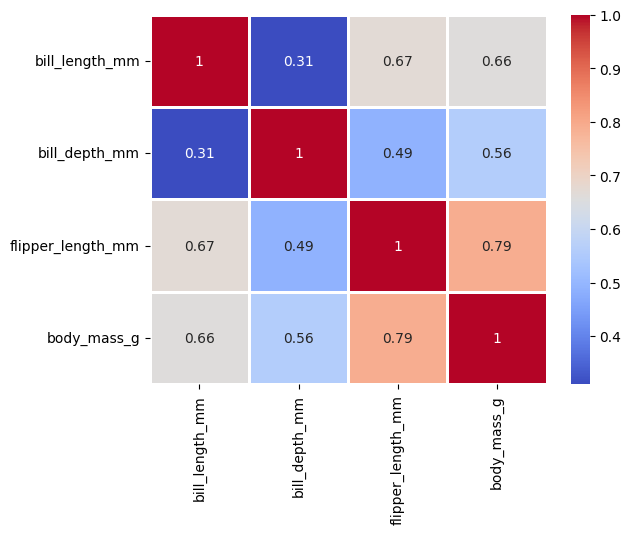

In [29]:
sns.heatmap(correlation, annot = True,cmap = "coolwarm", linewidth = 1)

Bill Length & Flipper Length (r=0.67): There is a moderately strong positive correlation between bill length and flipper length, suggesting that penguins with longer bills tend to have longer flippers.

Bill Length & Body Mass (r=0.66): A similar moderately strong positive correlation is observed between bill length and body mass, indicating that larger penguins generally have longer bills.

Flipper Length & Body Mass (r=0.79): A strong positive correlation is present, indicating that flipper length is a good predictor of body mass or vice versa.

Bill Depth & Body Mass (r=0.56): There's a moderate positive correlation between bill depth and body mass, which suggests that penguins with deeper bills are likely to have higher body mass, although not as strongly correlated as flipper length and body mass.

Bill Length & Bill Depth (r=0.31): There is a weak positive correlation, which implies that they are somewhat related but not significantly.

Bill Depth & Flipper Length (r=0.49): A moderate positive correlation exists, suggesting that deeper bills are somewhat associated with longer flippers, but other factors could be at play.

In summary, flipper length shows the strongest correlations with other variables, particularly with body mass, making it a valuable metric for predicting a penguin's physical characteristics. On the other hand, bill length and bill depth show moderate to weak correlations with other features, suggesting that they capture different aspects of penguin morphology.